# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

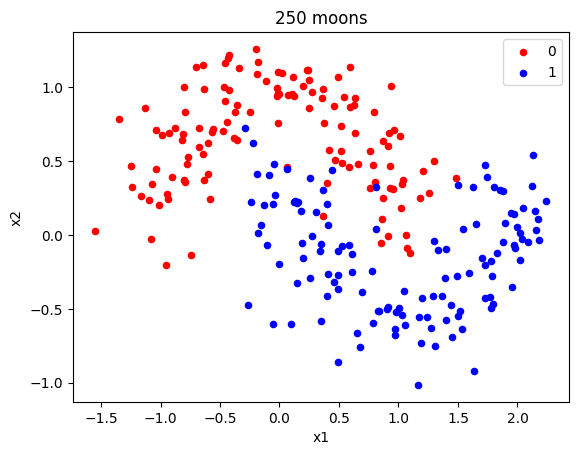

In [36]:
### This function allows to plot the two moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from utils.plots import plot_decision_regions

%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

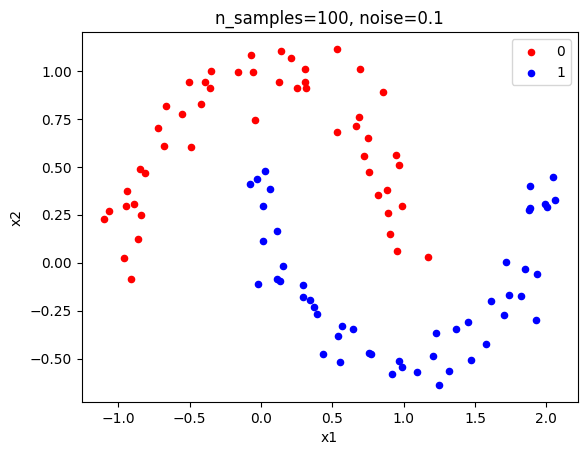

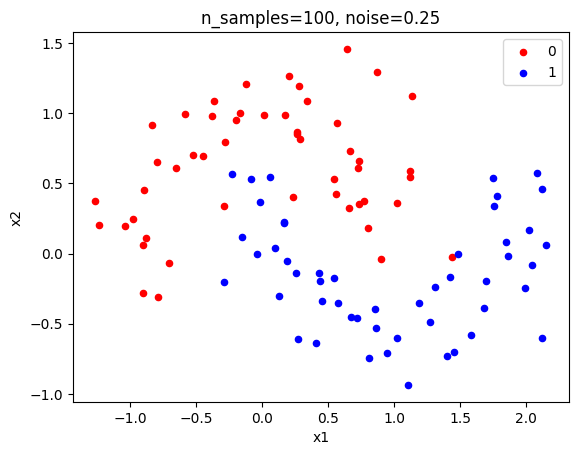

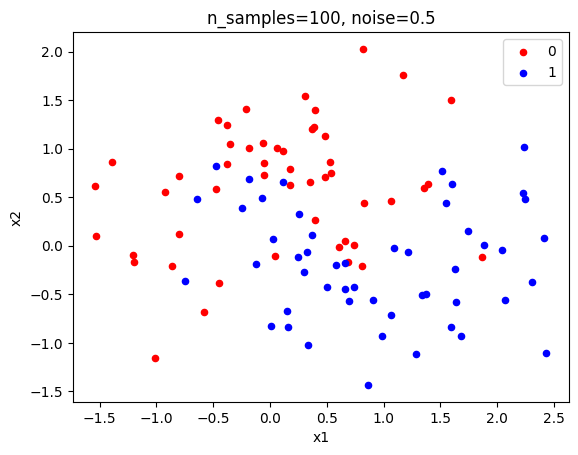

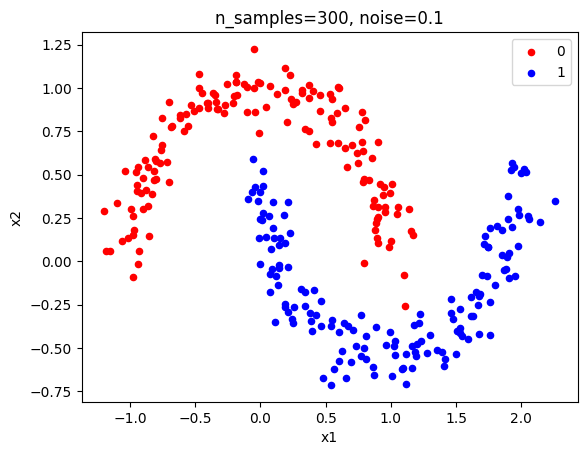

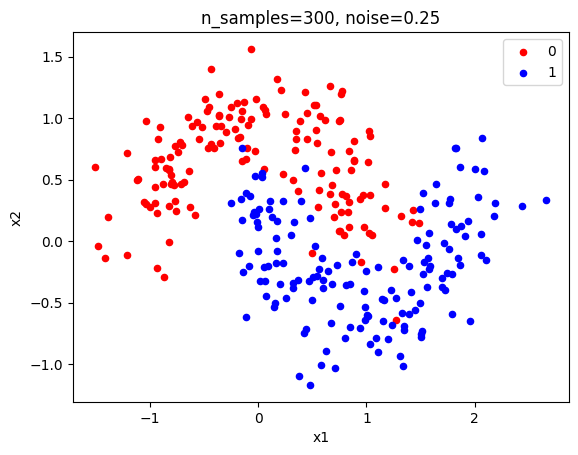

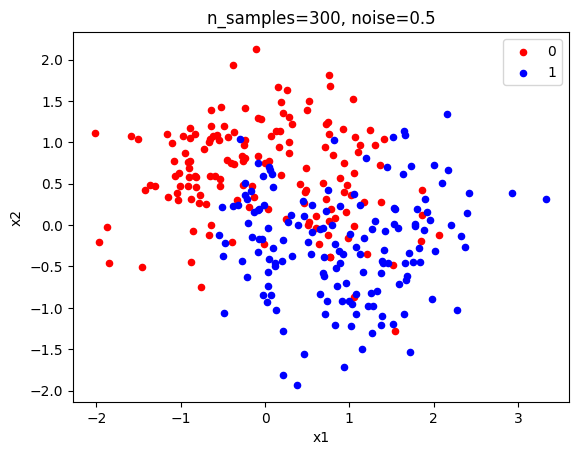

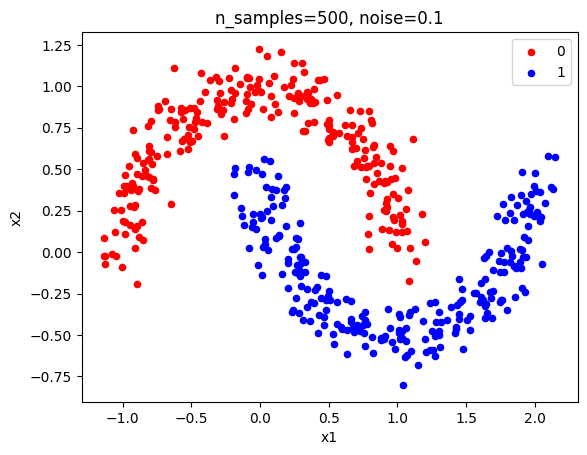

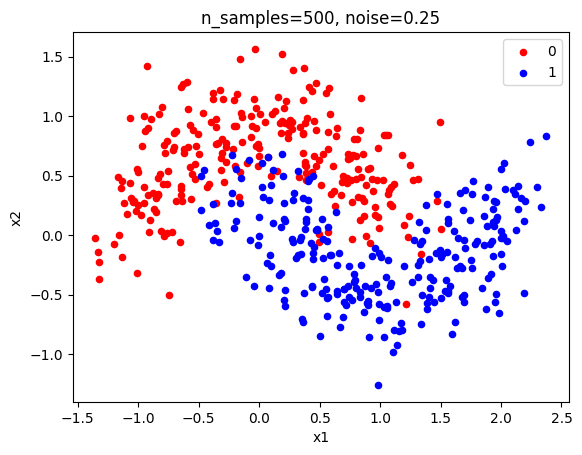

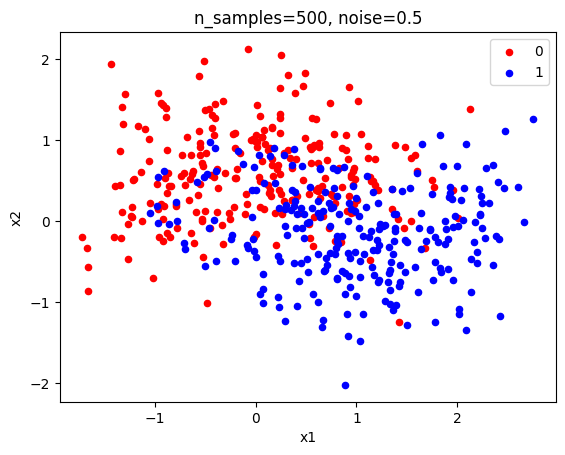

In [3]:
n_samples_values = [100, 300, 500]
noise_values = [0.1, 0.25, 0.5]

for n_samples in n_samples_values:
    for noise in noise_values:
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=0)

        def plot_moons(X, y):
            df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
            colors = {0:'red', 1:'blue'}
            fig, ax = plt.subplots()
            grouped = df.groupby('label')

            for key, group in grouped:
                group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

            plt.title(f"n_samples={n_samples}, noise={noise}")
            plt.show()

        plot_moons(X, y)


❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = models.Sequential()

model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons

model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"

2023-11-09 16:24:08.946187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-09 16:24:15.649983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = models.Sequential()

    model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons

    model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [8]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.9156 - accuracy: 0.4114
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9014 - accuracy: 0.4171
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.4114
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8734 - accuracy: 0.4114
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8594 - accuracy: 0.4057
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8459 - accuracy: 0.4057
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8331 - accuracy: 0.4114
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.4114
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8071 - accuracy: 0.4114
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.3943
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7943
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7943
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7943
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7943
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7943
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7943
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.7943
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8057
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8114
Epoch 93/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8114
Epoch 94/100
6/6 [===============

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [9]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x12f5b7220>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.9155885577201843,
   0.9013729691505432,
   0.8868604302406311,
   0.8733908534049988,
   0.8594177961349487,
   0.8458569049835205,
   0.8330851793289185,
   0.8198493123054504,
   0.8070551156997681,
   0.7952025532722473,
   0.7835518717765808,
   0.7713474035263062,
   0.7603288888931274,
   0.7495030164718628,
   0.7383636236190796,
   0.7277650237083435,
   0.7179179787635803,
   0.7084904909133911,
   0.699622392654419,
   0.690369188785553,
   0.6814759373664856,
   0.6730868816375732,
   0.6648557186126709,
   0.6567856073379517,
   0.649100124835968,
   0.6418195962905884,
   0.6342840790748596,
   0.6274892091751099,
   0.6208906173706055,
   0.6141921877861023,
   0.6077876091003418,
   0.6013726592063904,
   0.5954260230064392,
   0.589475691318512,
   0.5835281014442444,
   0.578163206577301,
   0.572762

In [10]:
history.history

{'loss': [0.9155885577201843,
  0.9013729691505432,
  0.8868604302406311,
  0.8733908534049988,
  0.8594177961349487,
  0.8458569049835205,
  0.8330851793289185,
  0.8198493123054504,
  0.8070551156997681,
  0.7952025532722473,
  0.7835518717765808,
  0.7713474035263062,
  0.7603288888931274,
  0.7495030164718628,
  0.7383636236190796,
  0.7277650237083435,
  0.7179179787635803,
  0.7084904909133911,
  0.699622392654419,
  0.690369188785553,
  0.6814759373664856,
  0.6730868816375732,
  0.6648557186126709,
  0.6567856073379517,
  0.649100124835968,
  0.6418195962905884,
  0.6342840790748596,
  0.6274892091751099,
  0.6208906173706055,
  0.6141921877861023,
  0.6077876091003418,
  0.6013726592063904,
  0.5954260230064392,
  0.589475691318512,
  0.5835281014442444,
  0.578163206577301,
  0.5727624297142029,
  0.5674656629562378,
  0.5620926022529602,
  0.5574444532394409,
  0.5523071885108948,
  0.5474632978439331,
  0.543000340461731,
  0.538285493850708,
  0.5338737368583679,
  0.52967

❓ Plot the history of the train loss using the following function ❓

In [11]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

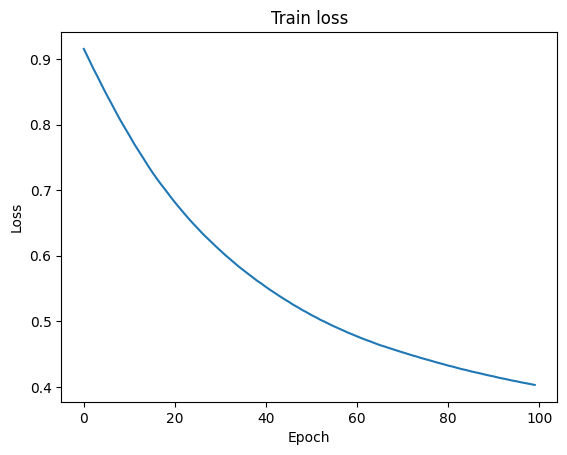

In [12]:
plot_history(history)

❓ What do you observe ❓

una linea curva perperdicular hacia abajo.

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [39]:
y_pred=model.predict(X_train)

6/6 [==============================] - 0s 10ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [34]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.3184 - accuracy: 0.8267


[0.3184018135070801, 0.8266666531562805]

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 0.3184 - accuracy: 0.8267


**🧪 Test your code**

In [32]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/juancorrea/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/juancorrea/code/Juancorreav/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1787/1787 [==============================] - 8s 4ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

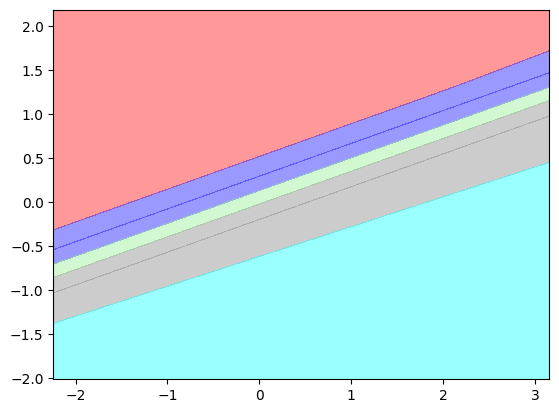

In [41]:
plot_decision_regions(X_test, y_pred, classifier=model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [42]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = models.Sequential()

    model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons

    model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

In [43]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 2s 7ms/step - loss: 0.7075 - accuracy: 0.5314
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 0.7008 - accuracy: 0.5657
Epoch 3/500
6/6 [==============================] - 0s 15ms/step - loss: 0.6943 - accuracy: 0.6057
Epoch 4/500
6/6 [==============================] - 0s 31ms/step - loss: 0.6879 - accuracy: 0.6457
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.6815 - accuracy: 0.6743
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6756 - accuracy: 0.7086
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.6701 - accuracy: 0.7200
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6639 - accuracy: 0.7371
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6584 - accuracy: 0.7429
Epoch 10/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6530 - accuracy: 0.7543
Epoch 11/500
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.4035 - accuracy: 0.8171
Epoch 85/500
6/6 [==============================] - 0s 10ms/step - loss: 0.4020 - accuracy: 0.8171
Epoch 86/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4005 - accuracy: 0.8171
Epoch 87/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3990 - accuracy: 0.8171
Epoch 88/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3976 - accuracy: 0.8171
Epoch 89/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3962 - accuracy: 0.8171
Epoch 90/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3950 - accuracy: 0.8171
Epoch 91/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3937 - accuracy: 0.8229
Epoch 92/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3925 - accuracy: 0.8343
Epoch 93/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3912 - accuracy: 0.8343
Epoch 94/500
6/6 [============

6/6 [==============================] - 0s 12ms/step - loss: 0.3326 - accuracy: 0.8343
Epoch 167/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3319 - accuracy: 0.8343
Epoch 168/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3313 - accuracy: 0.8343
Epoch 169/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3307 - accuracy: 0.8343
Epoch 170/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3301 - accuracy: 0.8343
Epoch 171/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3293 - accuracy: 0.8343
Epoch 172/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3287 - accuracy: 0.8343
Epoch 173/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3281 - accuracy: 0.8343
Epoch 174/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3274 - accuracy: 0.8343
Epoch 175/500
6/6 [==============================] - 0s 15ms/step - loss: 0.3268 - accuracy: 0.8343
Epoch 176/500
6/6 

6/6 [==============================] - 0s 13ms/step - loss: 0.2960 - accuracy: 0.8743
Epoch 249/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2958 - accuracy: 0.8743
Epoch 250/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2956 - accuracy: 0.8743
Epoch 251/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2954 - accuracy: 0.8743
Epoch 252/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2952 - accuracy: 0.8743
Epoch 253/500
6/6 [==============================] - 0s 18ms/step - loss: 0.2950 - accuracy: 0.8743
Epoch 254/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2949 - accuracy: 0.8743
Epoch 255/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2947 - accuracy: 0.8743
Epoch 256/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2946 - accuracy: 0.8743
Epoch 257/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.8743
Epoch 258/500
6

6/6 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.8629
Epoch 331/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2851 - accuracy: 0.8629
Epoch 332/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2850 - accuracy: 0.8571
Epoch 333/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2849 - accuracy: 0.8571
Epoch 334/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2848 - accuracy: 0.8571
Epoch 335/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2847 - accuracy: 0.8571
Epoch 336/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2847 - accuracy: 0.8571
Epoch 337/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2846 - accuracy: 0.8571
Epoch 338/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2845 - accuracy: 0.8571
Epoch 339/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2844 - accuracy: 0.8571
Epoch 340/500
6/6

6/6 [==============================] - 0s 9ms/step - loss: 0.2774 - accuracy: 0.8686
Epoch 413/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2773 - accuracy: 0.8686
Epoch 414/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2774 - accuracy: 0.8686
Epoch 415/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2772 - accuracy: 0.8686
Epoch 416/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2771 - accuracy: 0.8686
Epoch 417/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2771 - accuracy: 0.8686
Epoch 418/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2770 - accuracy: 0.8686
Epoch 419/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2769 - accuracy: 0.8686
Epoch 420/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2768 - accuracy: 0.8686
Epoch 421/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2767 - accuracy: 0.8686
Epoch 422/500
6/6 [

6/6 [==============================] - 0s 6ms/step - loss: 0.2726 - accuracy: 0.8743
Epoch 495/500
6/6 [==============================] - 0s 26ms/step - loss: 0.2725 - accuracy: 0.8743
Epoch 496/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2726 - accuracy: 0.8743
Epoch 497/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2724 - accuracy: 0.8743
Epoch 498/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8743
Epoch 499/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2723 - accuracy: 0.8743
Epoch 500/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2722 - accuracy: 0.8743


In [44]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

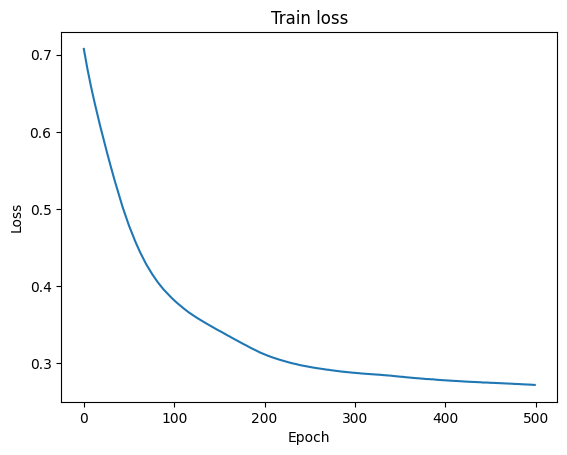

In [45]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [46]:
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.8667


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [47]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()

    model.add(layers.Dense(20, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons

    model.add(layers.Dense(10, activation='relu')) # Output layer that outputs a probability of belonging
    
    model.add(layers.Dense(5, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [50]:
history = model.fit(X_train, y_train, epochs=500)
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

Epoch 1/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 2/500
6/6 [==============================] - 0s 29ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.9886
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.9943
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.9886
Epoch 7/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 9/500
6/6 [==============================] - 0s 33ms/step - loss: 0.0342 - accuracy: 0.9886
Epoch 10/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 11/500
6/6 [===

6/6 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.9886
Epoch 85/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0323 - accuracy: 0.9943
Epoch 86/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 87/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 88/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9943
Epoch 89/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.9943
Epoch 90/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0323 - accuracy: 0.9886
Epoch 91/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0329 - accuracy: 0.9943
Epoch 92/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0344 - accuracy: 0.9886
Epoch 93/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 0.9886
Epoch 94/500
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9943
Epoch 167/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0317 - accuracy: 0.9943
Epoch 168/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 169/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9943
Epoch 170/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0312 - accuracy: 0.9943
Epoch 171/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9943
Epoch 172/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0311 - accuracy: 0.9943
Epoch 173/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0317 - accuracy: 0.9943
Epoch 174/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.9943
Epoch 175/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 0.9943
Epoch 176/500
6/6 [===

6/6 [==============================] - 0s 9ms/step - loss: 0.0302 - accuracy: 0.9943
Epoch 249/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9943
Epoch 250/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9943
Epoch 251/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9943
Epoch 252/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0306 - accuracy: 0.9943
Epoch 253/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9943
Epoch 254/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.9943
Epoch 255/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0305 - accuracy: 0.9943
Epoch 256/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9943
Epoch 257/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9943
Epoch 258/500
6/6 [==

6/6 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9943
Epoch 331/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 0.9943
Epoch 332/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9943
Epoch 333/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9943
Epoch 334/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9943
Epoch 335/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.9943
Epoch 336/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0296 - accuracy: 0.9943
Epoch 337/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0301 - accuracy: 0.9943
Epoch 338/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0299 - accuracy: 0.9943
Epoch 339/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.9943
Epoch 340/500
6/6 [====

6/6 [==============================] - 0s 17ms/step - loss: 0.0289 - accuracy: 0.9943
Epoch 413/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.9943
Epoch 414/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9943
Epoch 415/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0289 - accuracy: 0.9943
Epoch 416/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0293 - accuracy: 0.9943
Epoch 417/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0291 - accuracy: 0.9943
Epoch 418/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0292 - accuracy: 0.9943
Epoch 419/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.9943
Epoch 420/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9943
Epoch 421/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9943
Epoch 422/500
6/6 [

6/6 [==============================] - 0s 9ms/step - loss: 0.0294 - accuracy: 0.9943
Epoch 495/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0292 - accuracy: 0.9943
Epoch 496/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0291 - accuracy: 0.9943
Epoch 497/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0296 - accuracy: 0.9943
Epoch 498/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9943
Epoch 499/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0292 - accuracy: 0.9943
Epoch 500/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 0.9943


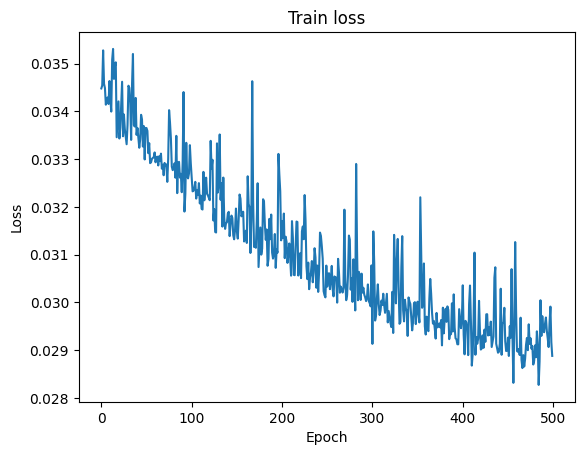

In [51]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [54]:
loss, accuracy_deep = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.9200


In [55]:
accuracy_deep.dtype()

AttributeError: 'float' object has no attribute 'dtype'

🧪 **Test your code**

In [53]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/juancorrea/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/juancorrea/code/Juancorreav/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

In [56]:
y_pred=model.predict(X_train)

6/6 [==============================] - 1s 4ms/step


1787/1787 [==============================] - 9s 5ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

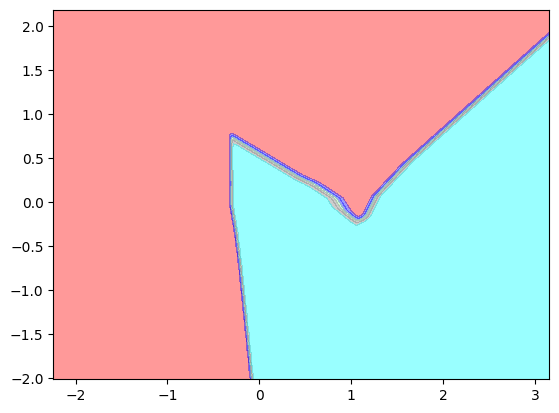

In [57]:
plot_decision_regions(X_test, y_pred, classifier=model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!